In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data for each sector
res_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Residential Sector', header=2)
com_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Commercial Sector', header=2)
industrial_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Industrial Sector', header=2)
transport_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Transportation Sector', header=2)
total_expend_tot = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)

In [3]:
resi_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Residential Sector', header= 2)
com_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Commercial Sector', header= 2)
industrial_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Industrial Sector', header= 2)
transport_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Transportation Sector', header= 2)
total_pr_avg_tot = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Total', header= 2)

In [4]:
coal_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header= 2)
natural_gas_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Natural Gas', header= 2)
petroleum_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Petroleum', header= 2)
nuclear_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Nuclear', header= 2)
total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header= 2)

In [5]:
biomass_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Biomass', header= 2)
geothermal_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Geothermal', header= 2)
hydro_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Hydropower', header= 2)
solar_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Solar Energy', header= 2)
wind_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Wind Energy', header= 2)

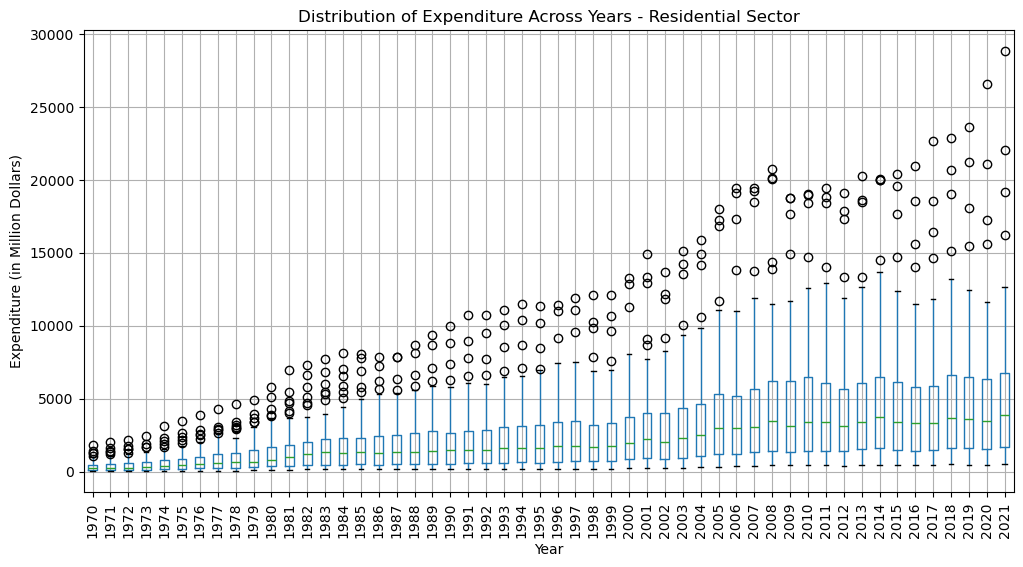

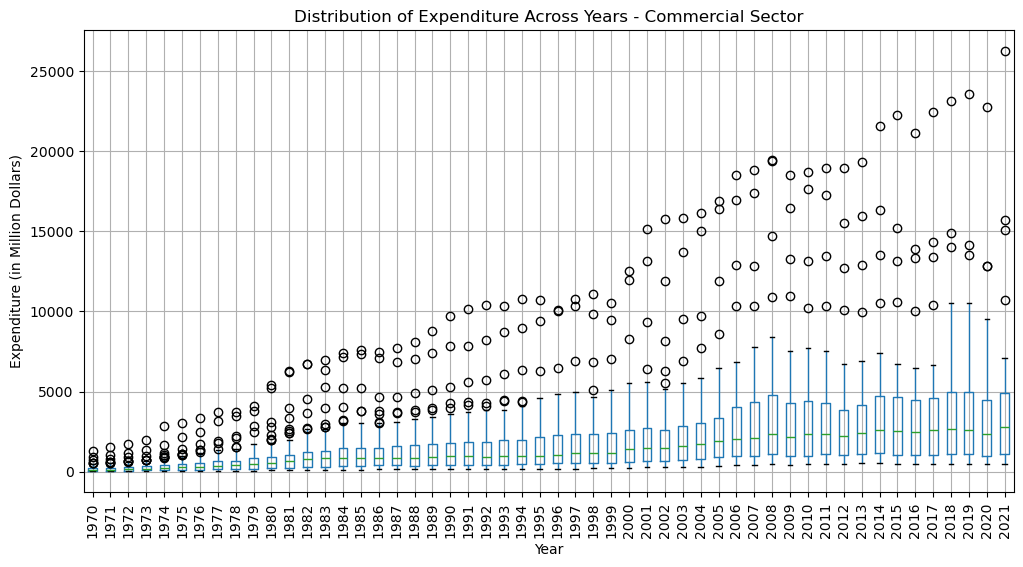

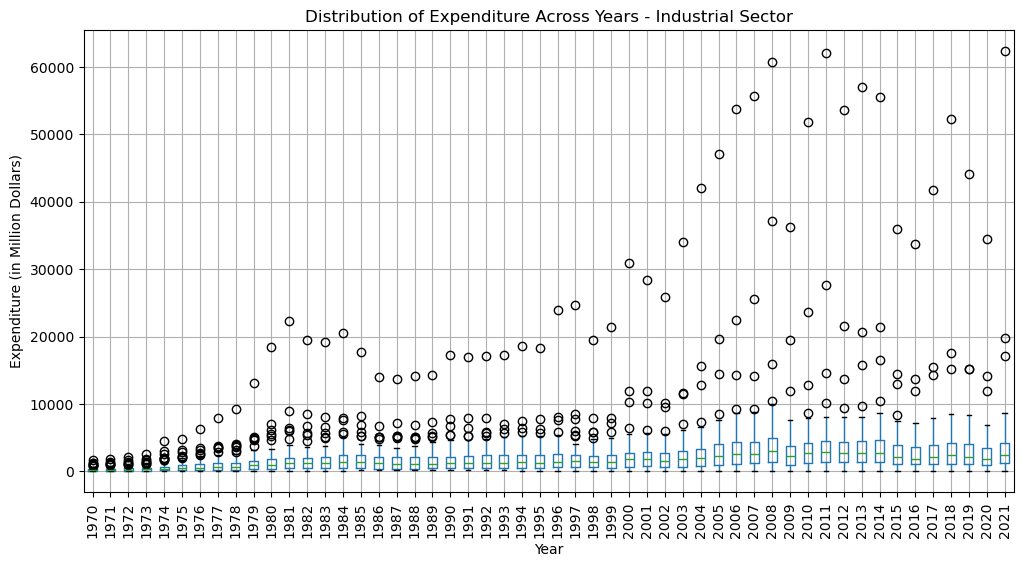

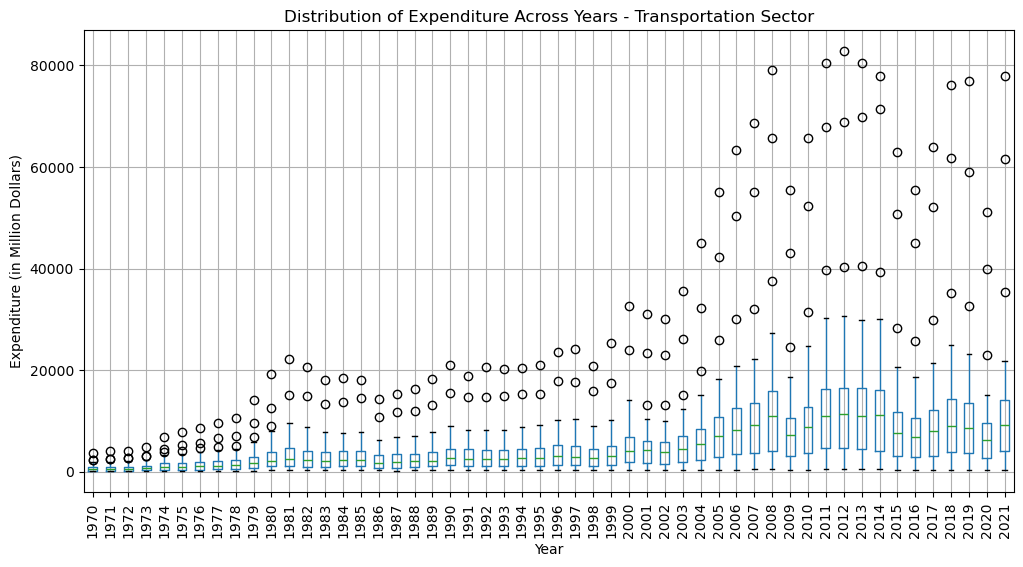

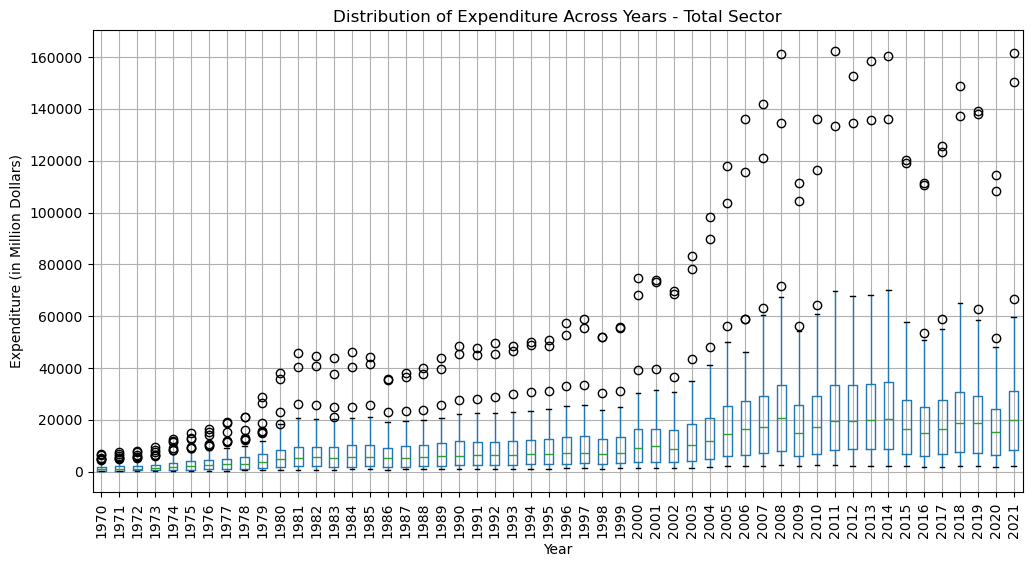

In [6]:
import matplotlib.pyplot as plt

def perform_eda(df, sector_name):
    # Exclude data for the 'US' state
    df = df[df['State'] != 'US']
    
    # Box Plot
    plt.figure(figsize=(12, 6))
    df.boxplot()
    plt.title(f'Distribution of Expenditure Across Years - {sector_name} Sector')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.xticks(rotation=90)  # Rotate X-axis labels to 90 degrees
    plt.show()

# Perform EDA for each sector
perform_eda(res_expend_tot, 'Residential')
perform_eda(com_expend_tot, 'Commercial')
perform_eda(industrial_expend_tot, 'Industrial')
perform_eda(transport_expend_tot, 'Transportation')
perform_eda(total_expend_tot, 'Total')


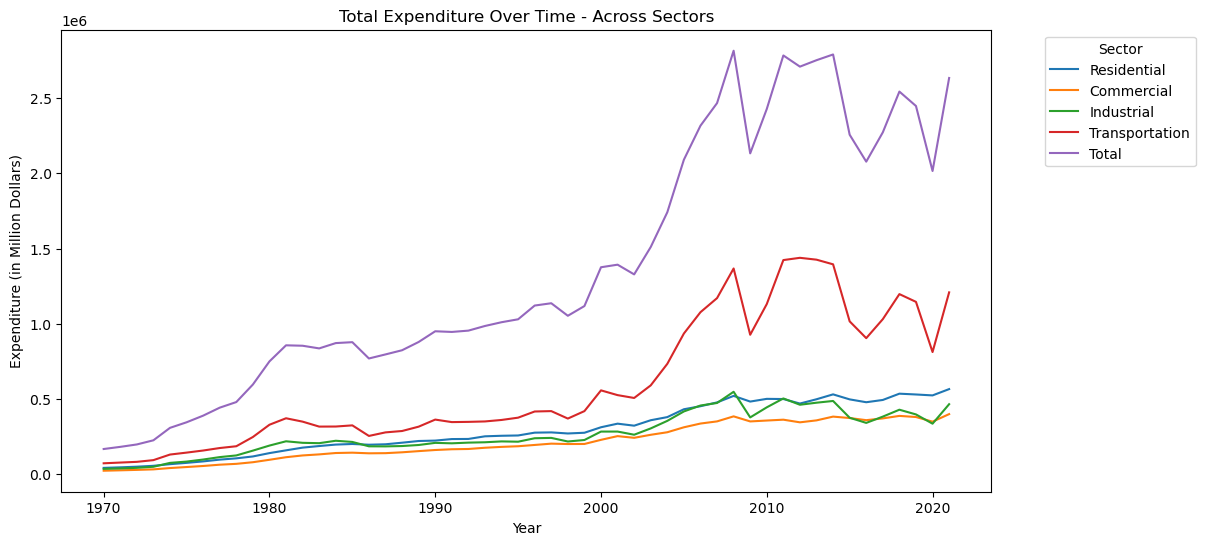

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract only the numerical columns (expenditure columns) from each DataFrame
res_expend_columns = res_expend_tot.columns[1:]
com_expend_columns = com_expend_tot.columns[1:]
industrial_expend_columns = industrial_expend_tot.columns[1:]
transport_expend_columns = transport_expend_tot.columns[1:]
total_expend_columns = total_expend_tot.columns[1:]

# Combine data for comparison
combined_df = pd.concat({'Residential': res_expend_tot[res_expend_columns].sum(axis=0),
                         'Commercial': com_expend_tot[com_expend_columns].sum(axis=0),
                         'Industrial': industrial_expend_tot[industrial_expend_columns].sum(axis=0),
                         'Transportation': transport_expend_tot[transport_expend_columns].sum(axis=0),
                         'Total': total_expend_tot[total_expend_columns].sum(axis=0)}, axis=1)

# Exclude data for the 'US' state
combined_df = combined_df.loc[:, combined_df.columns != 'US']

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, dashes=False)
plt.title('Total Expenditure Over Time - Across Sectors')
plt.xlabel('Year')
plt.ylabel('Expenditure (in Million Dollars)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


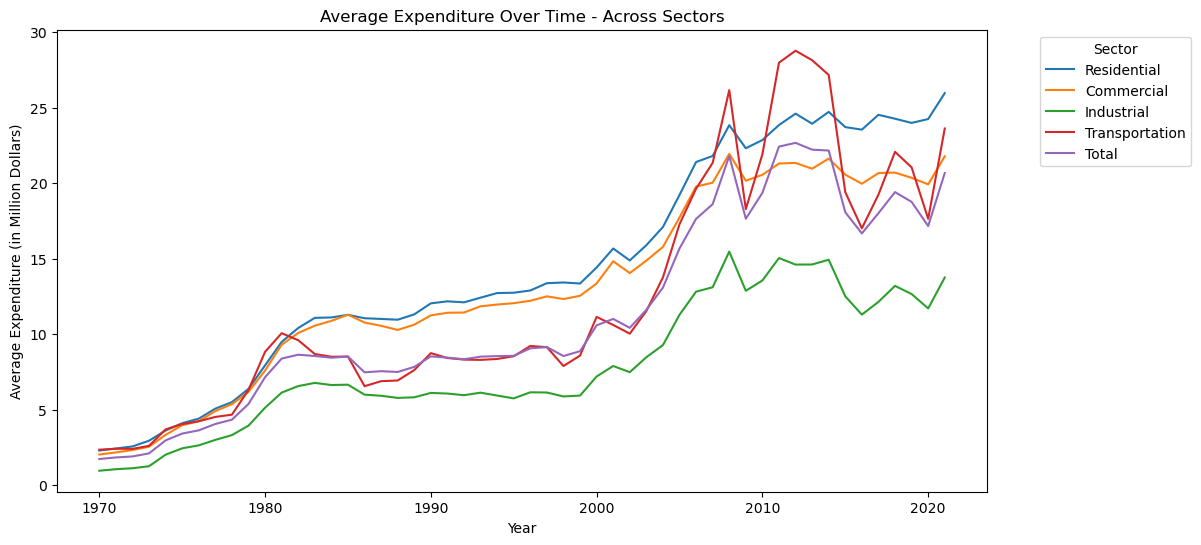

In [8]:
# Extract columns representing years
years = total_pr_avg_tot.columns[1:]

# Combine data for comparison
combined_df = pd.concat({'Residential': resi_pr_avg_tot.set_index('State').mean(axis=0),
                         'Commercial': com_pr_avg_tot.set_index('State').mean(axis=0),
                         'Industrial': industrial_pr_avg_tot.set_index('State').mean(axis=0),
                         'Transportation': transport_pr_avg_tot.set_index('State').mean(axis=0),
                         'Total': total_pr_avg_tot.set_index('State').mean(axis=0)}, axis=1)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, dashes=False)
plt.title('Average Expenditure Over Time - Across Sectors')
plt.xlabel('Year')
plt.ylabel('Average Expenditure (in Million Dollars)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

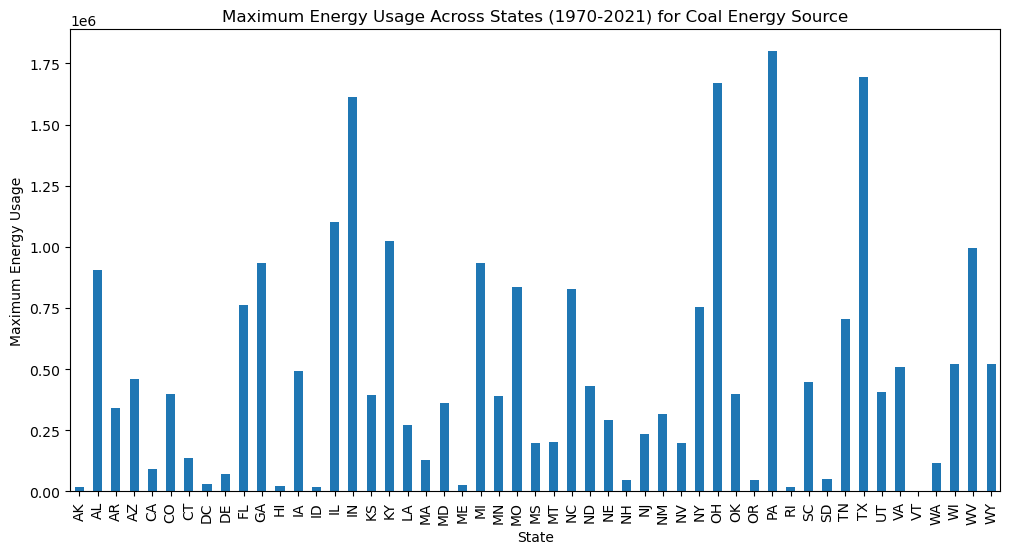

In [9]:
# Load the dataset
use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header=2)

# Exclude the last row 
use_energy_source = use_energy_source.iloc[:-1]

# Set the 'State' column as the index temporarily for easier computation
use_energy_source.set_index('State', inplace=True)

# Compute the maximum energy usage across years for each state
max_energy_usage = use_energy_source.max(axis=1)

# Plot the bar plot
plt.figure(figsize=(12, 6))
max_energy_usage.plot(kind='bar')
plt.title('Maximum Energy Usage Across States (1970-2021) for Coal Energy Source')
plt.xlabel('State')
plt.ylabel('Maximum Energy Usage')
plt.xticks(rotation=90)  # Rotate the state labels for better readability
plt.show()

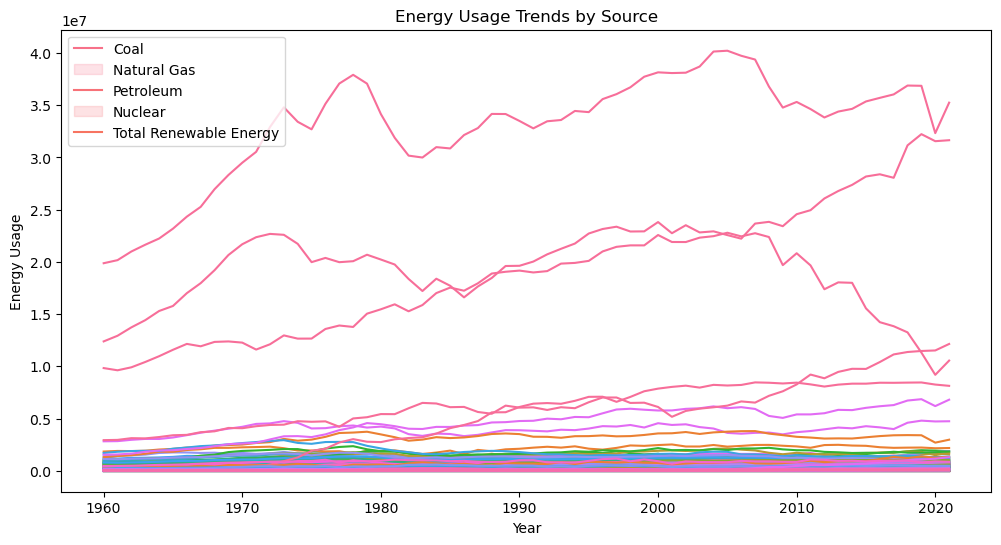

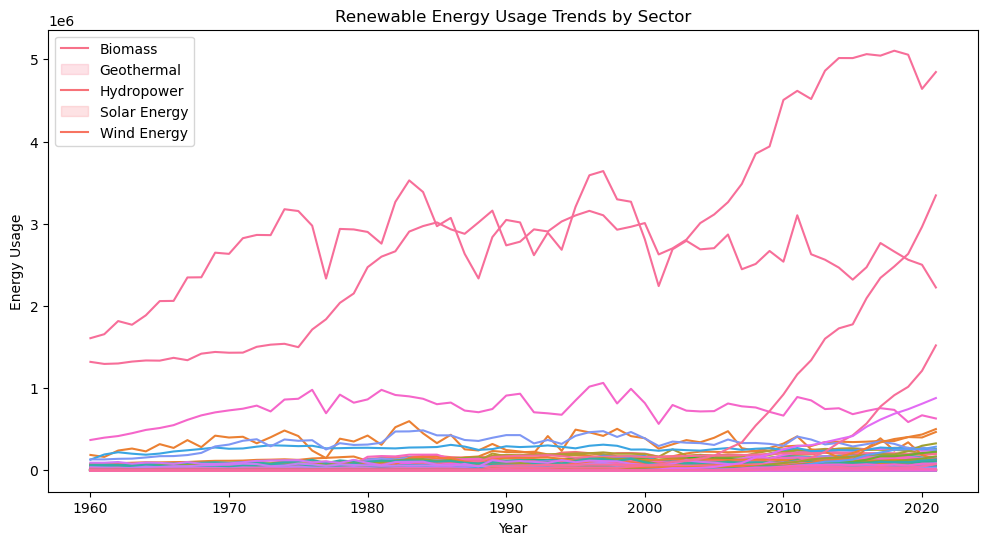

In [10]:
# Plot comparison for energy sources
plt.figure(figsize=(12, 6))
sns.lineplot(data=coal_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=natural_gas_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=petroleum_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=nuclear_use_energy_source.drop(columns='State').T, dashes=False)
sns.lineplot(data=total_renewable_use_energy_source.drop(columns='State').T, dashes=False)
plt.title('Energy Usage Trends by Source')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.legend(labels=['Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Total Renewable Energy'])
plt.show()

# Plot comparison for renewable sectors
plt.figure(figsize=(12, 6))
sns.lineplot(data=biomass_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=geothermal_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=hydro_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=solar_use_renew_sector.drop(columns='State').T, dashes=False)
sns.lineplot(data=wind_use_renew_sector.drop(columns='State').T, dashes=False)
plt.title('Renewable Energy Usage Trends by Sector')
plt.xlabel('Year')
plt.ylabel('Energy Usage')
plt.legend(labels=['Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy'])
plt.show()

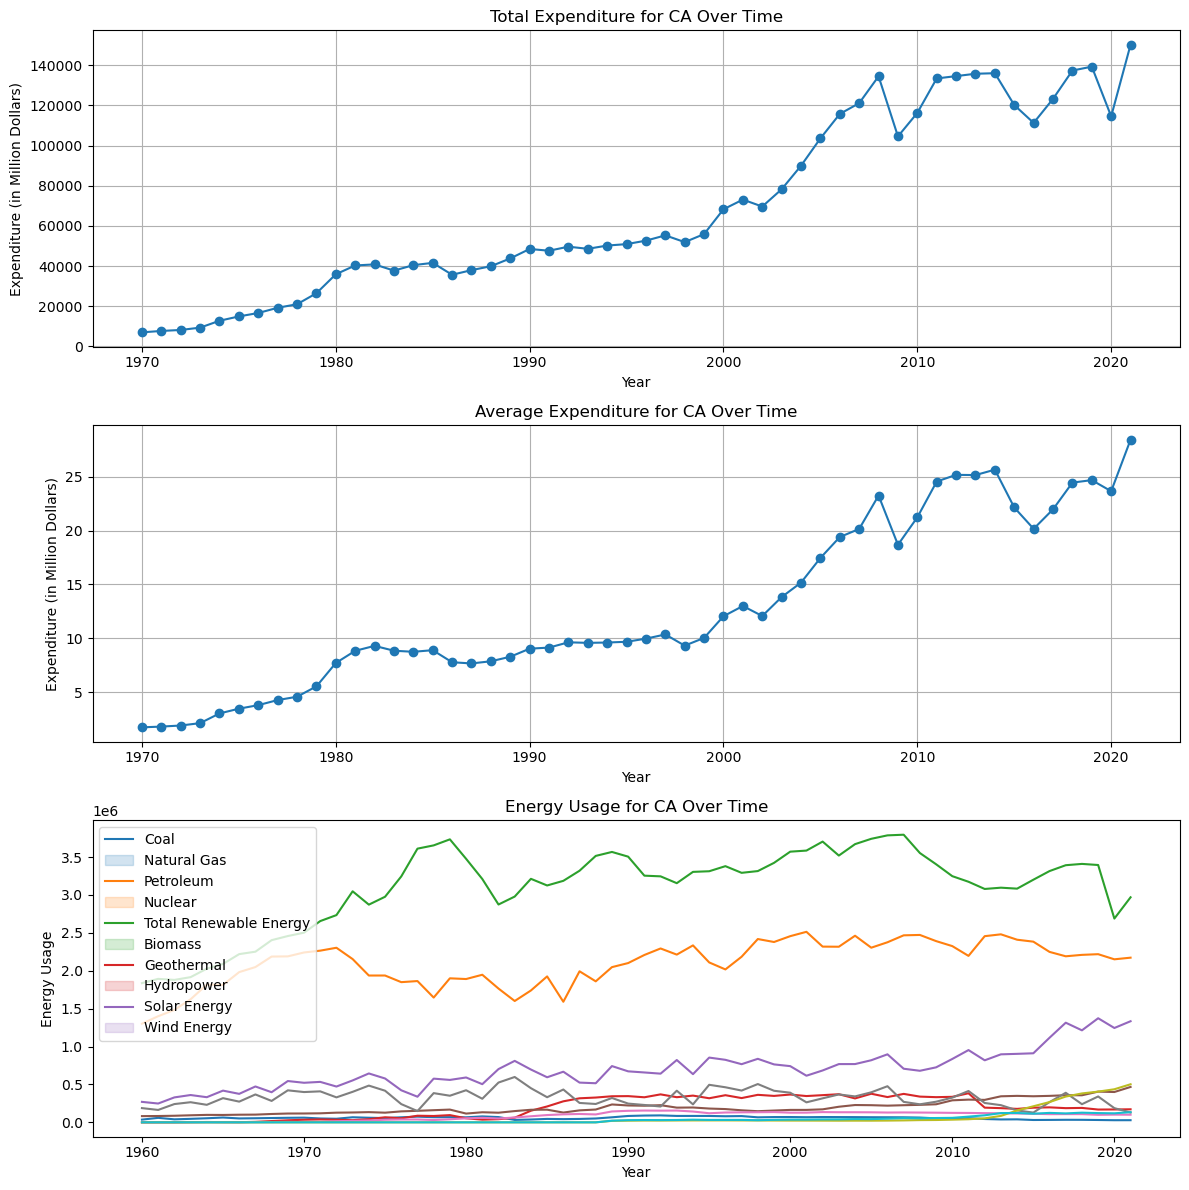

In [11]:
def state_comparison(state):
    # Load total expenditure data
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    
    # Load average expenditure data
    average_expenditure = pd.read_excel('pr_avg_tot.xlsx', sheet_name='Total', header=2)
    
    # Load energy usage data
    coal_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Coal', header=2)
    natural_gas_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Natural Gas', header=2)
    petroleum_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Petroleum', header=2)
    nuclear_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Nuclear', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Load renewable energy sector data
    biomass_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Biomass', header=2)
    geothermal_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Geothermal', header=2)
    hydro_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Hydropower', header=2)
    solar_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Solar Energy', header=2)
    wind_use_renew_sector = pd.read_excel('use_renew_sector.xlsx', sheet_name='Wind Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    average_expenditure_state = average_expenditure[average_expenditure['State'] == state].drop(columns='State').squeeze()
    
    # Filter energy usage data for the given state
    coal_usage_state = coal_use_energy_source[coal_use_energy_source['State'] == state].drop(columns='State').squeeze()
    natural_gas_usage_state = natural_gas_use_energy_source[natural_gas_use_energy_source['State'] == state].drop(columns='State').squeeze()
    petroleum_usage_state = petroleum_use_energy_source[petroleum_use_energy_source['State'] == state].drop(columns='State').squeeze()
    nuclear_usage_state = nuclear_use_energy_source[nuclear_use_energy_source['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Filter renewable energy sector data for the given state
    biomass_usage_state = biomass_use_renew_sector[biomass_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    geothermal_usage_state = geothermal_use_renew_sector[geothermal_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    hydro_usage_state = hydro_use_renew_sector[hydro_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    solar_usage_state = solar_use_renew_sector[solar_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    wind_usage_state = wind_use_renew_sector[wind_use_renew_sector['State'] == state].drop(columns='State').squeeze()
    
    # Plot total expenditure, average expenditure, and energy usage for the given state
    plt.figure(figsize=(12, 12))
    
    # Total expenditure
    plt.subplot(3, 1, 1)
    total_expenditure_state.plot(marker='o', linestyle='-')
    plt.title(f'Total Expenditure for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.grid(True)
    
    # Average expenditure
    plt.subplot(3, 1, 2)
    average_expenditure_state.plot(marker='o', linestyle='-')
    plt.title(f'Average Expenditure for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Expenditure (in Million Dollars)')
    plt.grid(True)
    
    # Energy usage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=coal_usage_state, dashes=False)
    sns.lineplot(data=natural_gas_usage_state, dashes=False)
    sns.lineplot(data=petroleum_usage_state, dashes=False)
    sns.lineplot(data=nuclear_usage_state, dashes=False)
    sns.lineplot(data=total_renewable_usage_state, dashes=False)
    sns.lineplot(data=biomass_usage_state, dashes=False)
    sns.lineplot(data=geothermal_usage_state, dashes=False)
    sns.lineplot(data=hydro_usage_state, dashes=False)
    sns.lineplot(data=solar_usage_state, dashes=False)
    sns.lineplot(data=wind_usage_state, dashes=False)
    plt.title(f'Energy Usage for {state} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Energy Usage')
    plt.legend(labels=['Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Total Renewable Energy', 'Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example usage:
state_comparison('CA')

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def build_lr_model(state):
    # Load the relevant datasets
    total_expenditure = pd.read_excel('expend_tot.xlsx', sheet_name='Total', header=2)
    total_renewable_use_energy_source = pd.read_excel('use_energy_source.xlsx', sheet_name='Total Renewable Energy', header=2)
    
    # Filter data for the given state
    total_expenditure_state = total_expenditure[total_expenditure['State'] == state].drop(columns='State').squeeze()
    total_renewable_usage_state = total_renewable_use_energy_source[total_renewable_use_energy_source['State'] == state].drop(columns='State').squeeze()
    
    # Merge the datasets
    merged_data = pd.concat([total_expenditure_state, total_renewable_usage_state], axis=1)
    merged_data.columns = ['Total_Expenditure', 'Total_Renewable_Usage']
    
    # Drop rows with missing values
    merged_data.dropna(inplace=True)
    
    # Split the data into features (X) and target variable (y)
    X = merged_data[['Total_Expenditure']]
    y = merged_data['Total_Renewable_Usage']
    
    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    return lr_model

def predict_energy_consumption(state, sector):
    # Build the Linear Regression model for the given state
    lr_model = build_lr_model(state)
    
    # Select the appropriate dataset based on the sector
    if sector == 'Residential':
        sector_data = res_expend_tot
    elif sector == 'Commercial':
        sector_data = com_expend_tot
    elif sector == 'Industrial':
        sector_data = industrial_expend_tot
    elif sector == 'Transportation':
        sector_data = transport_expend_tot
    elif sector == 'Total':
        sector_data = total_expend_tot
    else:
        return "Invalid sector"

    # Filter data for the given state
    sector_data_state = sector_data[sector_data['State'] == state].drop(columns='State').squeeze()
    
    # Prepare features (expenditure) for the given state
    X_state = sector_data_state.values.reshape(-1, 1)
    
    # Use the trained Linear Regression model to predict energy consumption
    predicted_energy_consumption = lr_model.predict(X_state)
    
    return predicted_energy_consumption

# Example usage:
state = 'CA'
sector = 'Commercial'
predicted_energy_consumption = predict_energy_consumption(state, sector)
print("Predicted energy consumption for", sector, "sector in", state + ":", predicted_energy_consumption)


Predicted energy consumption for Commercial sector in CA: [483352.27520344 483853.38519581 484412.01953654 485007.11297129
 486347.18722736 488460.19427684 489713.57690934 492413.57537268
 493616.72547562 494874.5642196  501512.95504012 505118.3543385
 506995.18747888 505461.06982237 508584.39887749 510354.6904431
 509972.68015789 510829.46886756 512441.36592467 515320.01394874
 518997.92633414 520820.47593452 521748.15732703 521459.32028211
 523355.59827264 523206.52108817 520653.57430408 523362.07988936
 524499.19852201 522340.82015551 528179.13641262 541045.14559427
 543492.76610672 543705.44415522 545216.47105218 548102.41089507
 554771.18429394 556027.80773479 558147.29640099 554676.79575051
 555420.15616765 556602.24101626 556385.91705836 558103.14038711
 567085.04075157 569887.52977923 565384.8316667  570524.75372264
 573527.36266642 575298.46443412 571874.95550484 586027.56560464]


/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to predict energy consumption for a given state and sector
def predict_energy_consumption(state, sector):
    # Select the appropriate dataset based on the sector
    if sector == 'Residential':
        sector_data = res_expend_tot
        sector_avg = resi_pr_avg_tot
    elif sector == 'Commercial':
        sector_data = com_expend_tot
        sector_avg = com_pr_avg_tot
    elif sector == 'Industrial':
        sector_data = industrial_expend_tot
        sector_avg = industrial_pr_avg_tot
    elif sector == 'Transportation':
        sector_data = transport_expend_tot
        sector_avg = transport_pr_avg_tot
    elif sector == 'Total':
        sector_data = total_expend_tot
        sector_avg = total_pr_avg_tot
    else:
        return "Invalid sector"

    # Merge the selected sector data with energy consumption data
    merged_data = pd.merge(sector_data, sector_avg, on='State')

    # Prepare features (expenditure) for the given state
    state_data = merged_data[merged_data['State'] == state]
    if len(state_data) == 0:
        return "State not found in the dataset", None, None, None, None
    X_state = state_data.drop(columns=['State']).values
    if len(X_state) == 0:
        return "No data available for the state", None, None, None, None

    # Use the trained Linear Regression model to predict energy consumption
    predicted_energy_consumption = lr_model.predict(X_state)
    
    # Extract the actual energy consumption for the given state and sector
    actual_energy_consumption = state_data.iloc[:, 1].values

    # Calculate evaluation metrics
    mse = mean_squared_error(actual_energy_consumption, predicted_energy_consumption)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_energy_consumption, predicted_energy_consumption)
    r2 = r2_score(actual_energy_consumption, predicted_energy_consumption)

    return predicted_energy_consumption, mse, rmse, mae, r2

# Example usage
state = 'CA'
sector = 'Commercial'
predicted_energy_consumption, mse, rmse, mae, r2 = predict_energy_consumption(state, sector)
print("Predicted energy consumption for", sector, "sector in", state + ":", predicted_energy_consumption)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Predicted energy consumption for Commercial sector in CA: [6003.22588616]
Mean Squared Error (MSE): 25961326.83100446
Root Mean Squared Error (RMSE): 5095.2258861609325
Mean Absolute Error (MAE): 5095.2258861609325
R-squared (R2): nan


/Users/sibivishtan/anaconda3/envs/ds4200/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Function to perform SVM Regression for a given state and energy source
def perform_svm_regression(state, energy_source):
    # Select the appropriate dataset based on the energy source
    if energy_source == 'Coal':
        energy_data = coal_use_energy_source
    elif energy_source == 'Natural Gas':
        energy_data = natural_gas_use_energy_source
    elif energy_source == 'Petroleum':
        energy_data = petroleum_use_energy_source
    elif energy_source == 'Nuclear':
        energy_data = nuclear_use_energy_source
    elif energy_source == 'Total Renewable Energy':
        energy_data = total_renewable_use_energy_source
    elif energy_source == 'Biomass':
        energy_data = biomass_use_renew_sector
    elif energy_source == 'Geothermal':
        energy_data = geothermal_use_renew_sector
    elif energy_source == 'Hydropower':
        energy_data = hydro_use_renew_sector
    elif energy_source == 'Solar Energy':
        energy_data = solar_use_renew_sector
    elif energy_source == 'Wind Energy':
        energy_data = wind_use_renew_sector
    else:
        return "Invalid energy source"

    # Merge the selected energy data with the total expenditure data
    merged_data = pd.merge(energy_data, total_expend_tot, on='State')

    # Prepare features (expenditure) and target variable (energy consumption)
    X = merged_data.drop(columns=['State']).values
    y = merged_data.iloc[:, 1:].mean(axis=1).values  

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and train the SVM Regression model
    svm_model = SVR(kernel='linear')
    svm_model.fit(X_train, y_train)

    # Make predictions for the given state
    state_data = merged_data[merged_data['State'] == state].drop(columns=['State']).values
    predicted_energy_consumption = svm_model.predict(state_data)

    return predicted_energy_consumption

# Example usage
state = 'CA'
energy_source = 'Biomass'
predicted_energy_consumption = perform_svm_regression(state, energy_source)
print("Predicted energy consumption for", energy_source, "in", state + ":", predicted_energy_consumption)


Predicted energy consumption for Biomass in CA: [137483.79670641]


In [100]:
# Function to perform Decision Tree Regression for a given energy source and sector
from sklearn.tree import DecisionTreeRegressor


def perform_decision_tree_regression(energy_source, sector):
    # Select the appropriate dataset based on the energy source
    if energy_source == 'Coal':
        energy_data = coal_use_energy_source
    elif energy_source == 'Natural Gas':
        energy_data = natural_gas_use_energy_source
    elif energy_source == 'Petroleum':
        energy_data = petroleum_use_energy_source
    elif energy_source == 'Nuclear':
        energy_data = nuclear_use_energy_source
    elif energy_source == 'Total Renewable Energy':
        energy_data = total_renewable_use_energy_source
    elif energy_source == 'Biomass':
        energy_data = biomass_use_renew_sector
    elif energy_source == 'Geothermal':
        energy_data = geothermal_use_renew_sector
    elif energy_source == 'Hydropower':
        energy_data = hydro_use_renew_sector
    elif energy_source == 'Solar Energy':
        energy_data = solar_use_renew_sector
    elif energy_source == 'Wind Energy':
        energy_data = wind_use_renew_sector
    else:
        return "Invalid energy source"

    # Merge the selected energy data with the total expenditure data for the given sector
    if sector == 'Residential':
        sector_data = res_expend_tot
    elif sector == 'Commercial':
        sector_data = com_expend_tot
    elif sector == 'Industrial':
        sector_data = industrial_expend_tot
    elif sector == 'Transportation':
        sector_data = transport_expend_tot
    elif sector == 'Total':
        sector_data = total_expend_tot
    else:
        return "Invalid sector"

    merged_data = pd.merge(energy_data, sector_data, on='State')

    # Prepare features (expenditure) and target variable (energy consumption)
    X = merged_data.drop(columns=['State']).values
    y = merged_data.iloc[:, 1:].mean(axis=1).values  
    # Instantiate and train the Decision Tree Regression model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X, y)

    # Predict energy consumption for all states
    predicted_energy_consumption = dt_model.predict(X)

    # Get the indices of the top 10 states with the highest predicted energy consumption
    top_10_indices = np.argsort(predicted_energy_consumption)[::-1][:11]  # Include 11 indices

    # Get the corresponding state names excluding the first result
    top_10_states = merged_data.iloc[top_10_indices]['State'].tolist()[1:]  # Exclude the first result

    return top_10_states

# Example usage
energy_source = 'Coal'
sector = 'Transportation'
top_10_states = perform_decision_tree_regression(energy_source, sector)
print("Top 10 states with highest predicted energy consumption for", energy_source, "in", sector)
print(top_10_states)


Top 10 states with highest predicted energy consumption for Coal in Transportation sector (excluding the first result):
['PA', 'OH', 'IN', 'TX', 'IL', 'WV', 'MI', 'KY', 'AL', 'NC']
